In [80]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install numpy pandas tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [82]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Input,BatchNormalization,Activation,LeakyReLU
from keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [103]:
stock_data = yf.download("AAPL", start="2010-01-01", end="2024-12-20")
stock_data.to_csv("AAPL_historical_data.csv")

[*********************100%***********************]  1 of 1 completed


In [104]:
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-12-13,248.130005,248.130005,249.289993,246.240005,247.820007,33155300
2024-12-16,251.039993,251.039993,251.380005,247.649994,247.990005,51694800
2024-12-17,253.479996,253.479996,253.830002,249.779999,250.080002,51356400
2024-12-18,248.050003,248.050003,254.279999,247.740005,252.160004,56774100
2024-12-19,249.789993,249.789993,252.000000,247.089996,247.500000,60882300


In [105]:
data= stock_data[['Close']]
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data)

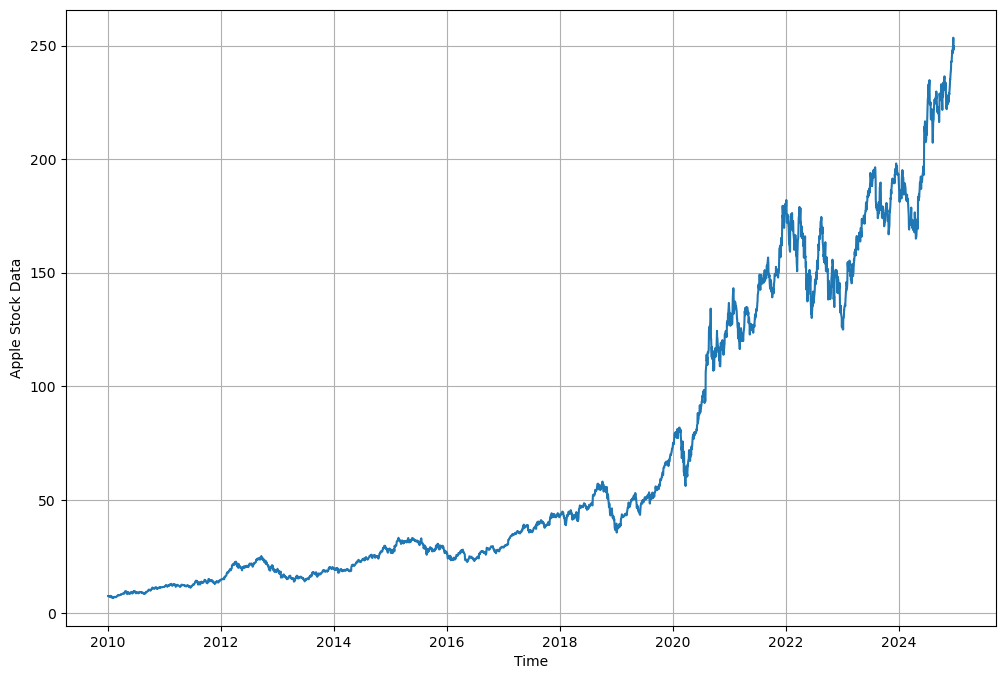

In [106]:
stock_data.reset_index(inplace=True)

plt.figure(figsize=(12,8))
plt.plot(stock_data['Date'],stock_data['Close'])
plt.xlabel('Time')
plt.ylabel('Apple Stock Data')
plt.grid(True)
plt.show()
         

In [107]:
# CREATING SEQUENCE

In [108]:
def create_seq(data,time_step):
    X,y=[],[]
    for i in range(time_step,len(data)):
        X.append(data[i-time_step:i,0]),
        y.append(data[i,0])
    return np.array(X),np.array(y)

In [109]:
X,y=create_seq(data,30)
X=X.reshape(X.shape[0],X.shape[1],1)

In [110]:
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [13]:
# MODEL 1 BASIC

In [81]:
def create_model1(units,learning_rate=0.001):
    model1 = Sequential()
    model1.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
    model1.add(LSTM(50,return_sequences = True))
    model1.add(LSTM(50))
    model1.add(Dense(1))
    model1.compile(loss = 'mean_squared_error',optimizer = 'adam')

    return model

In [82]:
model1=create_model1(150,0.001)
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
history1=model1.fit(X_train, y_train,validation_data=(X_test, y_test),epochs = 50, batch_size=32)

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - loss: 1.8139e-04 - mae: 0.0089 - mse: 1.8139e-04 - val_loss: 6.6133e-04 - val_mae: 0.0203 - val_mse: 6.6133e-04
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 1.6880e-04 - mae: 0.0080 - mse: 1.6880e-04 - val_loss: 6.8845e-04 - val_mae: 0.0205 - val_mse: 6.8845e-04
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 1.2407e-04 - mae: 0.0071 - mse: 1.2407e-04 - val_loss: 0.0016 - val_mae: 0.0331 - val_mse: 0.0016
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 1.6059e-04 - mae: 0.0081 - mse: 1.6059e-04 - val_loss: 9.4486e-04 - val_mae: 0.0253 - val_mse: 9.4486e-04
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 1.1880e-04 - mae: 0.0069 - mse: 1.1880e-04 - val_loss: 6.0666e-04 - val_mae: 0.0191 - val_mse: 6.0666e-04
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 1.2367e-04 - mae: 0.0074 - mse: 1.2367e-04 - val_loss: 0.0015 - val_mae: 0.0317 - val_mse: 0.0015
Epoch 7/50
93/

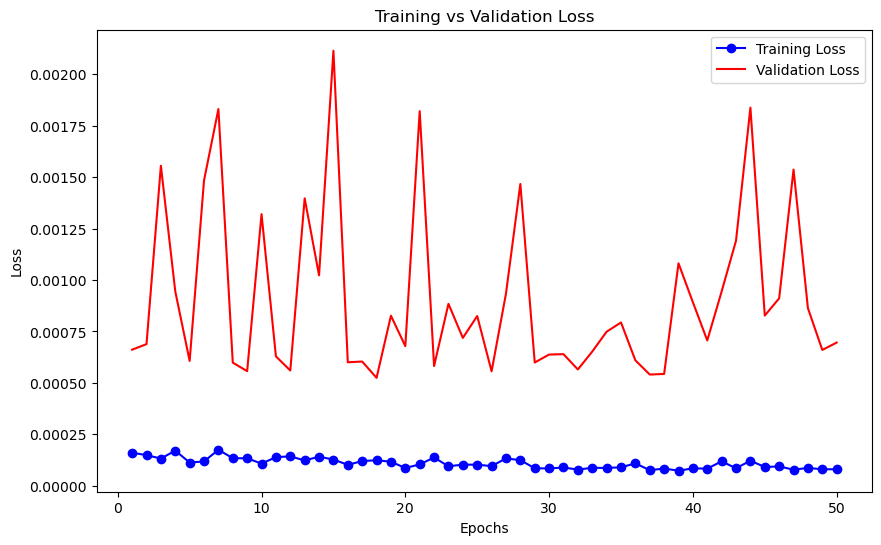

In [85]:
train_loss = history1.history['loss']  
val_loss = history1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [86]:
predictions1 = model1.predict(X_test)
predictions1 = scaler.inverse_transform(predictions1) 
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Text(0, 0.5, 'Stock Price')

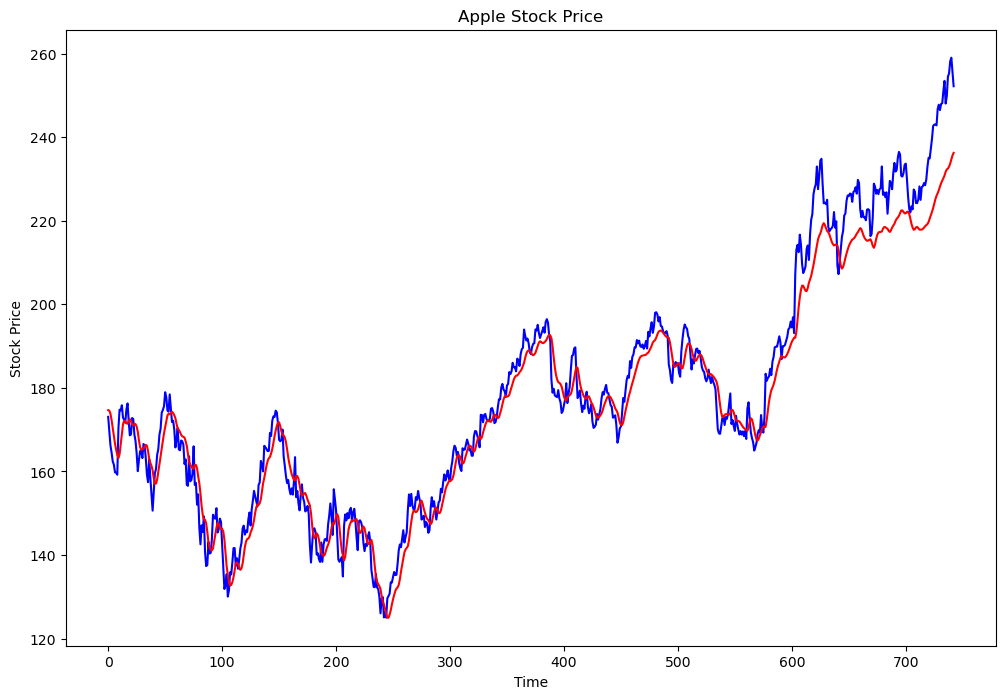

In [87]:
plt.figure(figsize=(12,8))
plt.plot(y_test_actual, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions1,color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [ ]:
# MODEL 2 ACTIVATION+L2

In [171]:
def create_model2(units=50, learning_rate=0.001, dropout_rate=0.2, activation='relu' , l2_lambda=0.001):
    model = Sequential()
    model.add(Input(shape=(60, 1)))

    model.add(LSTM(units=units, activation = activation, kernel_regularizer=regularizers.l2(l2_lambda),return_sequences=True))
    model.add(Dropout(rate=dropout_rate))

    
    model.add(LSTM(units=units, activation = activation, kernel_regularizer=regularizers.l2(l2_lambda),return_sequences=True))
    model.add(Dropout(rate=dropout_rate))

    model.add(LSTM(units=units, activation = activation))

    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model




In [172]:
model2=create_model2(150,0.001,0.2)
model2.compile(optimizer='adam',loss='mean_squared_error')
history2=model2.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=50,batch_size=32)  

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 0.1416 - val_loss: 0.0077
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - loss: 0.0013 - val_loss: 0.0065
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - loss: 7.8026e-04 - val_loss: 0.0065
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 6.8439e-04 - val_loss: 0.0033
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 7.2397e-04 - val_loss: 0.0018
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - loss: 7.2071e-04 - val_loss: 0.0022
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - loss: 7.0801e-04 - val_loss: 0.0020
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - loss: 5.9760e-04 - val_loss: 0.0045
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 8.4734e-04 - val_loss: 0.0019
Epoch 12/50
9

In [173]:
total_loss = sum(history2.history['loss'])
print(f"Total loss across all epochs: {total_loss}")

Total loss across all epochs: 0.10247302896459587


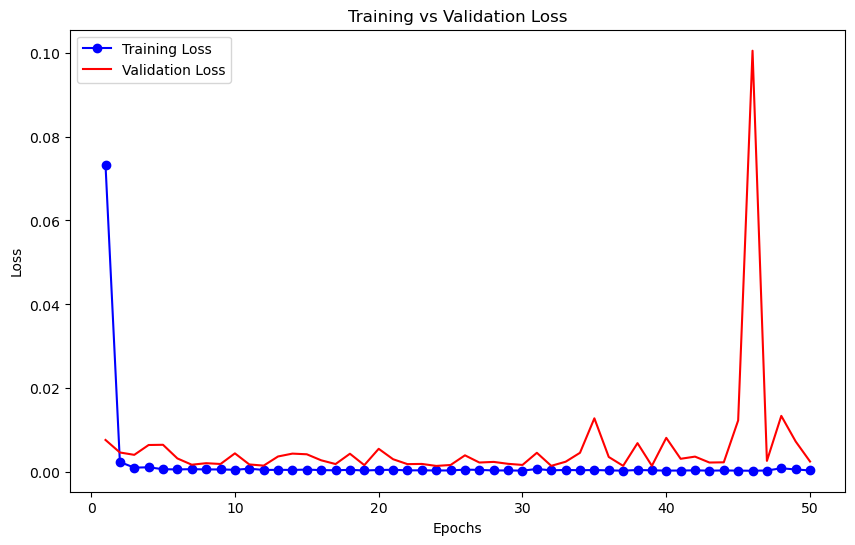

In [174]:
train_loss = history2.history['loss'] 
val_loss = history2.history['val_loss']

epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [175]:
predictions2 = model2.predict(X_test)
predictions2 = scaler.inverse_transform(predictions2)  
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)) 

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


Text(0, 0.5, 'Stock Price')

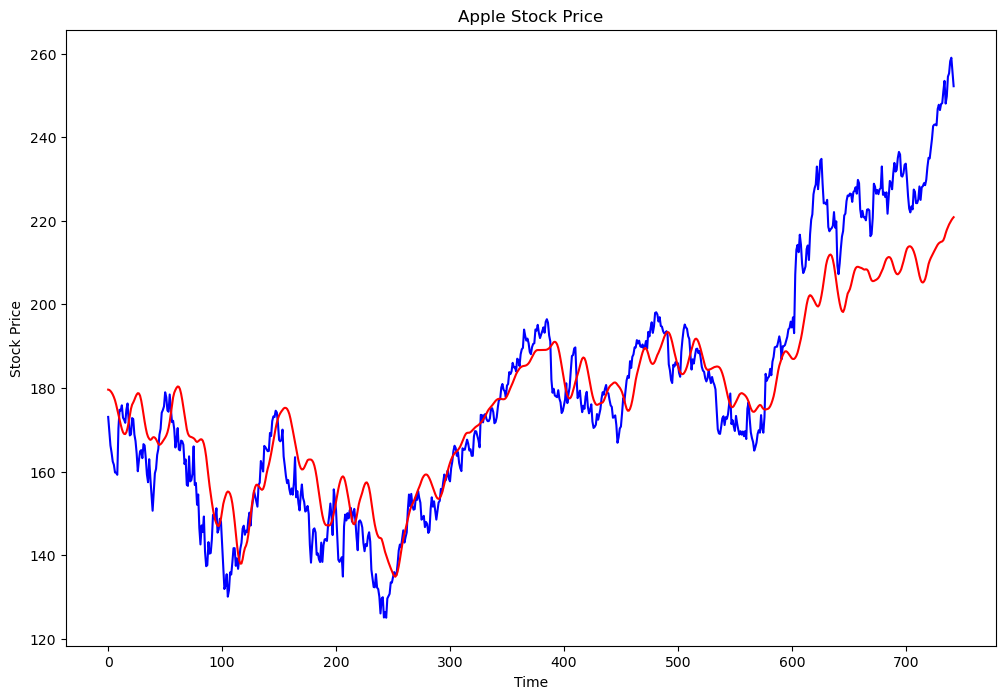

In [176]:
plt.figure(figsize=(12,8))
plt.plot(y_test_actual, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions2,color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [122]:
# MODEL3 ACTIVATION

In [153]:
def create_model3(units=50, learning_rate=0.01, dropout_rate=0.2, activation='relu' ):
    model = Sequential()
    model.add(Input(shape=(60, 1)))

    model.add(LSTM(units=units, activation = activation,return_sequences=True))
    model.add(Dropout(rate=dropout_rate))

    
    model.add(LSTM(units=units, activation = activation ,return_sequences=True))
    model.add(Dropout(rate=dropout_rate))

    model.add(LSTM(units=units, activation = activation))

    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])
    
    return model


In [159]:
model3=create_model3(150,0.001,0.2)
model3.compile(optimizer='adam',loss='mean_squared_error')
history3=model3.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=50,batch_size=32)  

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - loss: 0.0091 - mae: 0.0518 - mse: 0.0091 - val_loss: 0.0028 - val_mae: 0.0441 - val_mse: 0.0028
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - loss: 2.3331e-04 - mae: 0.0096 - mse: 2.3331e-04 - val_loss: 0.0035 - val_mae: 0.0504 - val_mse: 0.0035
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - loss: 2.7017e-04 - mae: 0.0106 - mse: 2.7017e-04 - val_loss: 0.0016 - val_mae: 0.0334 - val_mse: 0.0016
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 2.5617e-04 - mae: 0.0108 - mse: 2.5617e-04 - val_loss: 0.0010 - val_mae: 0.0260 - val_mse: 0.0010
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 2.1012e-04 - mae: 0.0089 - mse: 2.1012e-04 - val_loss: 9.5374e-04 - val_mae: 0.0256 - val_mse: 9.5374e-04
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 2.5538e-04 - mae: 0.0105 - mse: 2.5538e-04 - val_loss: 8.9180e-04 - val_mae: 0.0247 - val_mse: 8.9180e-04
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 

In [160]:
total_loss = sum(history3.history['loss'])
print(f"Total loss across all epochs: {total_loss}")

Total loss across all epochs: 0.010360156171373092


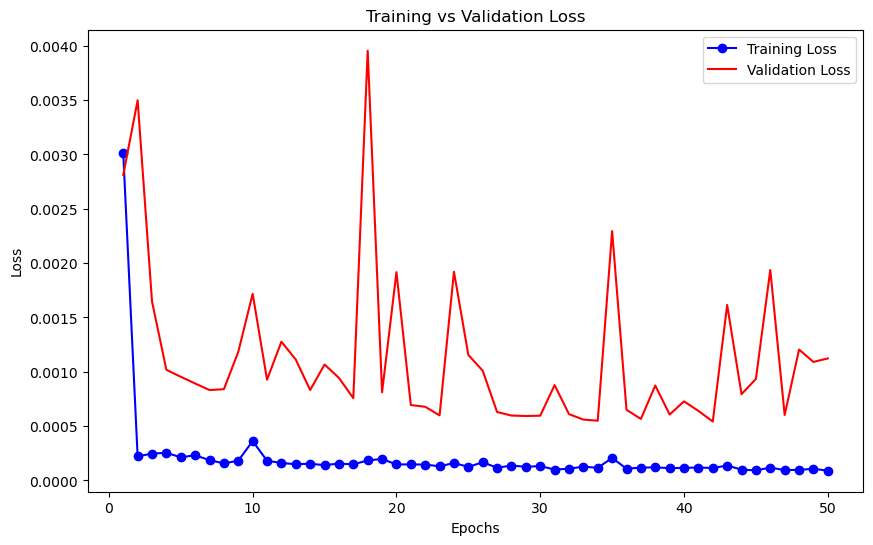

In [161]:
train_loss = history3.history['loss']  
val_loss = history3.history['val_loss']

epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [162]:
predictions3 = model3.predict(X_test)
predictions3 = scaler.inverse_transform(predictions3) 
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


Text(0, 0.5, 'Stock Price')

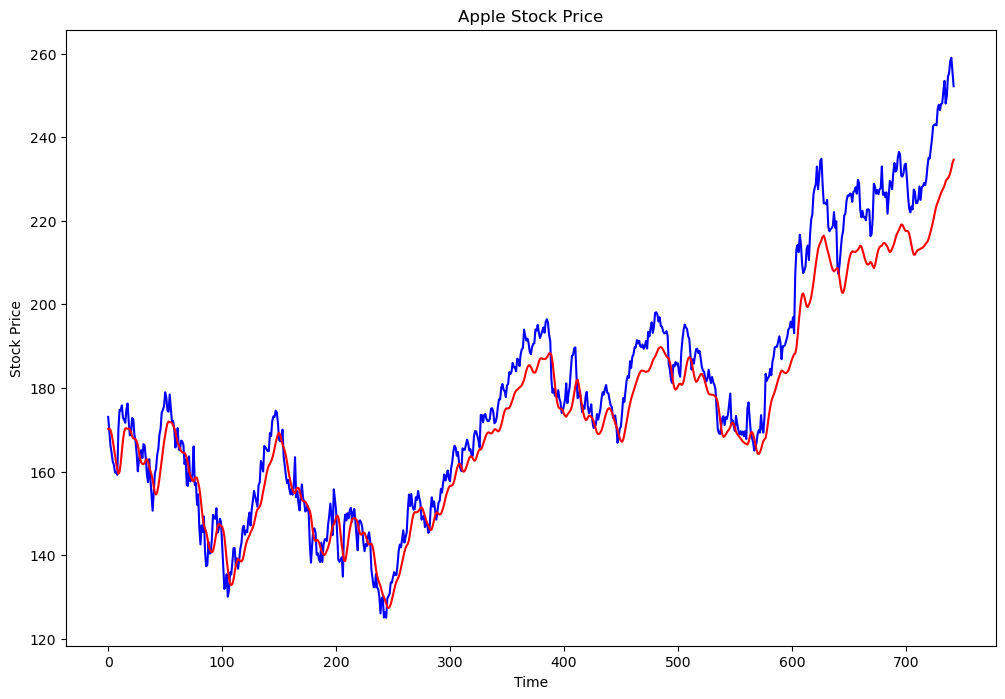

In [163]:
plt.figure(figsize=(12,8))
plt.plot(y_test_actual, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions3,color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [83]:
# MODEL4 L2

In [111]:
def create_model4(units=50, learning_rate=0.001, dropout_rate=0.2, l2_lambda=0.001):
    model = Sequential()
    model.add(Input(shape=(60, 1)))

    model.add(LSTM(units=units,  kernel_regularizer=regularizers.l2(l2_lambda),return_sequences=True))
    model.add(Dropout(rate=dropout_rate))

    
    model.add(LSTM(units=units,  kernel_regularizer=regularizers.l2(l2_lambda),return_sequences=True))
    model.add(Dropout(rate=dropout_rate))

    model.add(LSTM(units=units))
    model.add(Dropout(rate=dropout_rate))

    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

In [132]:
model4=create_model4(150,0.001,0.1,0.0001)
model4.compile(optimizer='adam',loss='mean_squared_error')
history4=model4.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=50,batch_size=32,callbacks=[lr_scheduler])  

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0215 - val_loss: 0.0057 - learning_rate: 0.0010
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0036 - val_loss: 0.0058 - learning_rate: 0.0010
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0020 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0012 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 8.2172e-04 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 7.1827e-04 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 4.6069e-04 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 4.3325e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 3.7493e-04 - val_loss: 0.0015 - learning_rate: 0.0010

In [133]:
total_loss = sum(history4.history['loss'])
print(f"Total loss across all epochs: {total_loss}")

Total loss across all epochs: 0.030165496355039068


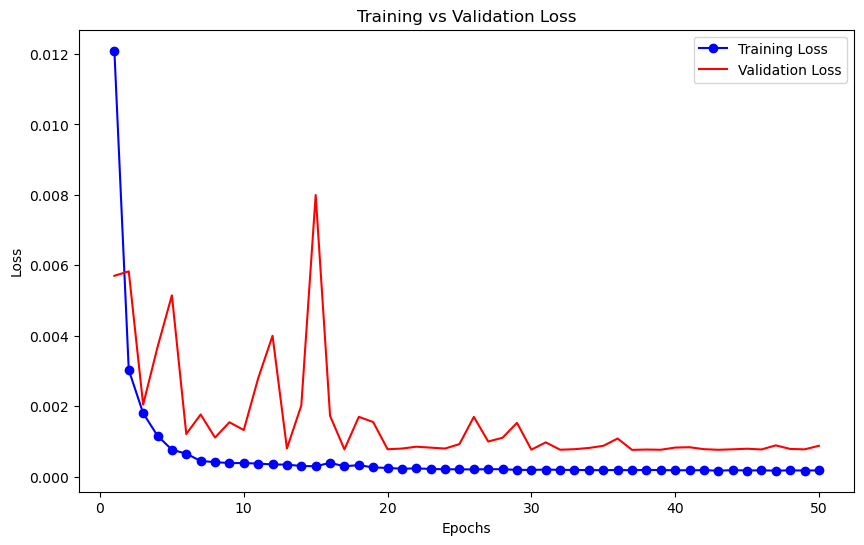

In [134]:
train_loss = history4.history['loss']  
val_loss = history4.history['val_loss']

epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [135]:
predictions4 = model4.predict(X_test)
predictions4 = scaler.inverse_transform(predictions4) 
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


Text(0, 0.5, 'Stock Price')

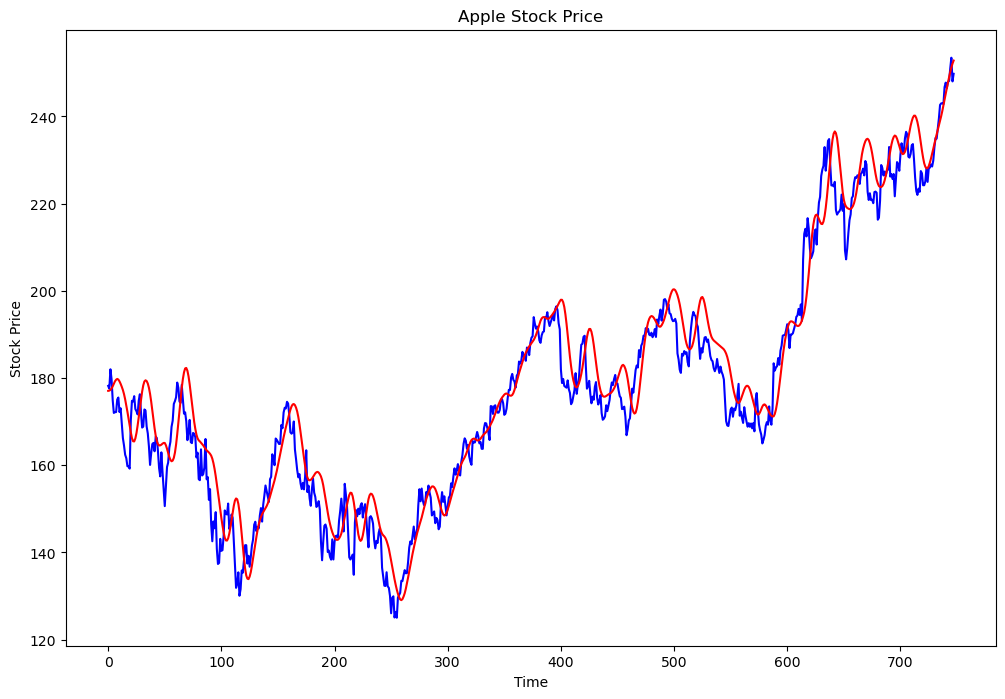

In [136]:
plt.figure(figsize=(12,8))
plt.plot(y_test_actual, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions4,color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [ ]:
#EXPERIMENT

In [23]:
'''
model_grid= KerasRegressor(model=create_model, epochs=25, batch_size=32,verbose=0)

param_grid={
    'model__units':[50,100],
    'model__learning_rate':[0.0001,0.001,0.01]
}

grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train,y_train, validation_data=(X_test, y_test))


print(f"Best parameters:{grid_results.best_param_}")
print(f"Best score:{grid_results.best_score_}")

SyntaxError: incomplete input (1055189481.py, line 1)

In [13]:
model_l2=[0.01,0.001,0.0001]
model_learning_rate=[0.0001,0.001,0.01]
model_dropout=[0.1,0.2]

best_loss=float('inf')
best_model=None
history_best=None

for l2 in model_l2:
    for rate in model_learning_rate:
        for drop_rate in model_dropout:
             model=create_model4(150,rate,drop_rate,l2)
             model.compile(optimizer='adam', loss='mean_squared_error')
             history=model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs=50,batch_size=32)
             total_loss=sum(history.history['loss'])

             if total_loss < best_loss:
                 best_loss=total_loss
                 best_model=model
                 history_best=history
                        
            

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 1.2731 - val_loss: 0.0389
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0145 - val_loss: 0.0085
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0018 - val_loss: 0.0124
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0011 - val_loss: 0.0106
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0010 - val_loss: 0.0039
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 9.7295e-04 - val_loss: 0.0126
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0010 - val_loss: 0.0045
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss:

In [14]:
best_model.summary()
print(f"Best Model Loss: {best_loss}")

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                  │ (None, 60, 150)        │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 60, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 60, 150)        │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 60, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,357,655 (5.18 MB)

 Trainable params: 452,551 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 905,104 (3.45 MB)

Best Model Loss: 0.032754478947026655


In [15]:
model.save('model4.keras')

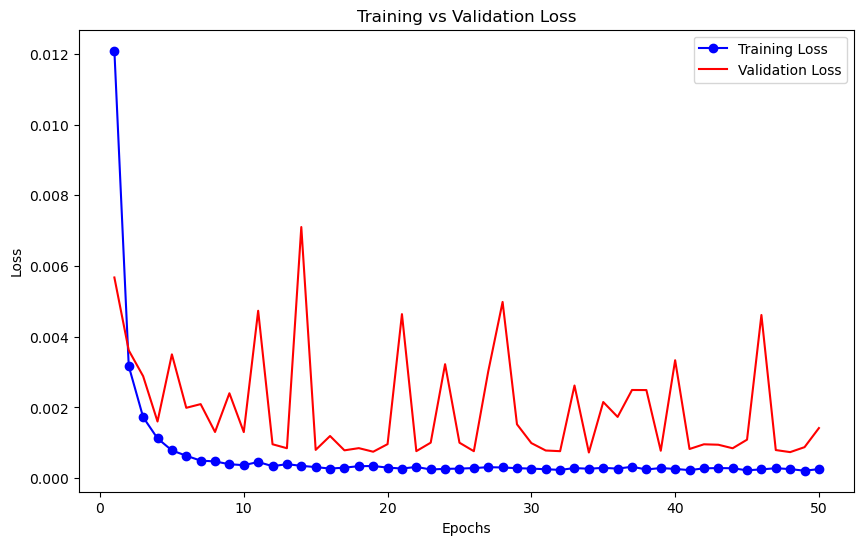

In [16]:
train_loss = history_best.history['loss'] 
val_loss = history_best.history['val_loss']

epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [17]:
predicts = best_model.predict(X_test)
predicts = scaler.inverse_transform(predicts) 
y_test_act = scaler.inverse_transform(y_test.reshape(-1, 1)) 

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


Text(0, 0.5, 'Stock Price')

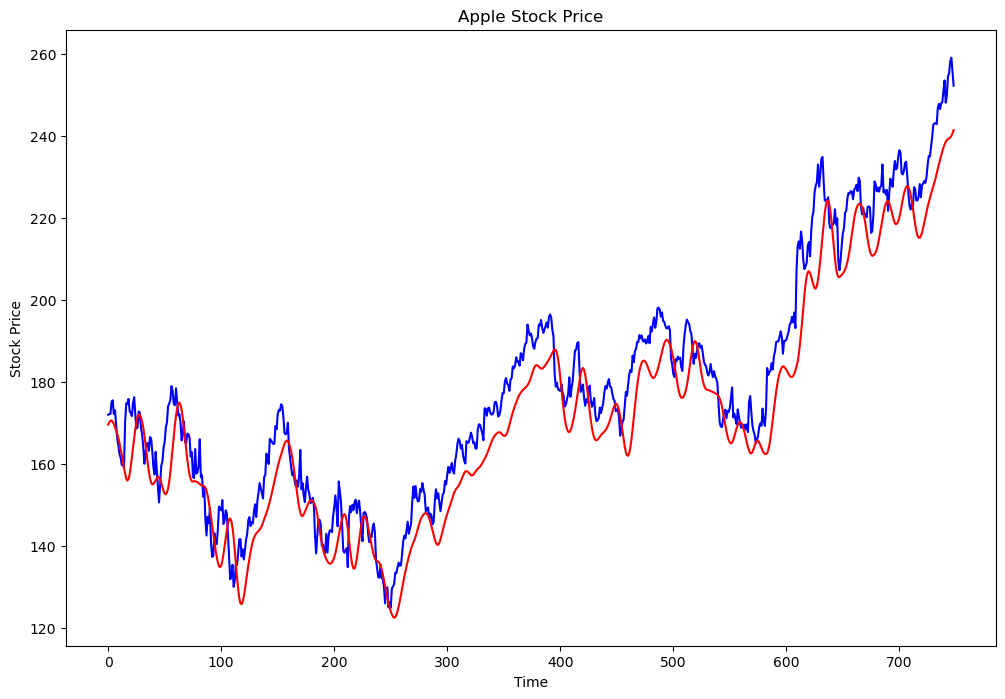

In [18]:
plt.figure(figsize=(12,8))
plt.plot(y_test_act, color='blue', label='Actual Apple Stock Price')
plt.plot(predicts,color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [ ]:
#FUTURE PREDICTION

In [137]:
def predict_future(model, data, num_predictions, scaler):
    predictions = []
    last_data_point = data[-1:] 

    for _ in range(num_predictions):
        prediction = model.predict(last_data_point, verbose=0)
        predictions.append(prediction[0, 0]) 
        last_data_point = np.append(last_data_point[0][1:], prediction).reshape(1, -1, 1)

  
    return np.array(predictions).reshape( -1, 1)



In [138]:
future_prediction = predict_future(model4,X_test,5,scaler)
print(future_prediction.shape)
scaler.inverse_transform(future_prediction)

(5, 1)


array([[252.82574],
       [253.39677],
       [253.81912],
       [254.24812],
       [254.74216]], dtype=float32)

In [139]:
stock_data2 = yf.download("AAPL", start="2024-12-20", end="2025-01-15")
stock_data2.to_csv("AAPL_historical_data.csv")

[*********************100%***********************]  1 of 1 completed


In [146]:
stock_data2.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-12-20,254.490005,254.490005,255.000000,245.690002,248.039993,147495300
2024-12-23,255.270004,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.200012,258.209991,255.289993,255.490005,23234700
2024-12-26,259.019989,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
